In [102]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pd.options.mode.chained_assignment = None  # default='warn'
from my_functions import integer_perturbation, get_X_pca_totals, contains_at_least_one, add_new_elements_pca, get_accuracies, small_multiples, plot_accuracies

import os
if os.path.exists('logging.log'):
    os.remove('logging.log')
    print("File removed")
else:
    print("The file does not exist") 

import logging
logging.basicConfig(filename='logging.log', format='%(asctime)s - %(levelname)s: \t%(message)s', datefmt='%d/%m/%Y %I:%M:%S: %p',  level=logging.DEBUG)
logging.info('File di logging inizializzato.')

The file does not exist


In [2]:
df = pd.read_excel('data/IncidentiModificato.xlsx', index_col='VERBALE')
df = df.drop(columns=["DATA"])
X = df[['SESSO', 'ANNI', 'PESO', 'ALTEZZA', 'BMI', 'Tot Testa', 'Tot Torace', 'Tot Addome', 'Tot Scheletro']]
y = df['Mezzo']

df.head()

,SESSO,ANNI,PESO,ALTEZZA,BMI,Mezzo,Testa:Neurocranio,Testa:Splancnocranio,Testa:Telencefalo,Testa:Cervelletto,Testa:Tronco-encefalico,Torace:Polmoni,Torace:Trachea/bronchi,Torace:Cuore,Torace:Aorta-toracica,Torace:Diaframma,Addome:Fegato,Addome:Milza,Addome:Aorta-addominale,Addome:Reni,Addome:Mesentere,Scheletro:Rachide-cervicale,Scheletro:Rachide-toracico,Scheletro:Rachide-lombare,Scheletro:Bacino-e-sacro,Scheletro:Complesso-sterno/claveo/costale,Tot Testa,Tot Torace,Tot Addome,Tot Scheletro,Totale
VERBALE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
85567,0,81,84.0,1.75,27.428571,0,1,0,0,0,1,0,0,0,0,0,3,0,0,0,0,0,3,0,3,3,2,0,3,9,14
85829,1,69,69.0,1.62,26.291724,1,4,4,4,4,4,3,0,2,0,2,1,0,0,0,0,0,0,0,0,4,20,7,1,4,32
85977,1,71,67.0,1.55,27.887617,1,2,0,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,6,0,0,4,10
86220,1,54,60.0,1.59,23.733238,1,4,0,0,1,0,2,0,1,0,0,1,1,0,0,0,0,0,0,0,4,5,3,2,4,14
86247,1,78,69.0,1.67,24.740937,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,4,2,0,2,4,8


In [3]:
params = {'activation': ['relu', 'logistic', 'tanh', 'normal'],
          'hidden_layer_sizes' : [(2), (3,3), (5), (6,3), (5,5),(6), (8), (10), (20)],
          #'alpha' : [0.0001, 0.001, 0.01, 0.1]
         }

#_range = [x for x in range(140, 200, 10)] + [x for x in range(200,2000,100)] + [2**e for e in range(11,15)]
_range = [x for x in range(140, 200, 20)] + [x for x in range(200,2001,200)]

## Procedura di data augmentation perturbando i dati continui

In [4]:
logging.info('Started augmenting data excluding NONE')
accuracies_excluding = {}
accuracies_excluding['NONE'] = get_accuracies(df, params, _range, perturbation_kind="personal_data")

In [5]:
features = ['SESSO', 'ANNI', 'PESO', 'ALTEZZA', 'BMI']
for i in range(len(features)):
    for j in range(len(features)):
        if i < j : 
            excluded_features = [features[i], features[j]]
            logging.info('Started augmenting data excluding {0} and {1}'.format(features[i], features[j]))
            df_new = df.drop(columns=excluded_features)
            df_new['Mezzo'] = y
            accuracies_excluding[features[i] + " " + features[j]] = get_accuracies(df_new, params, _range, perturbation_kind="personal_data", exclude=excluded_features, excluded_feature=df[excluded_features])

## Procedura di data augmentation perturbando i dati relativi alle lesioni

In [6]:
logging.info('Started augmenting data excluding NONE')
accuracies_excluding_body_parts = {}
accuracies_excluding_body_parts['NONE'] = get_accuracies(df, params, _range, perturbation_kind="body_parts")

In [7]:
features = ['SESSO', 'ANNI', 'PESO', 'ALTEZZA', 'BMI']
for i in range(len(features)):
    for j in range(len(features)):
        if i < j : 
            excluded_features = [features[i], features[j]]
            logging.info('Started augmenting data excluding {0} and {1}'.format(features[i], features[j]))
            df_new = df.drop(columns= excluded_features)
            df_new['Mezzo'] = y
            accuracies_excluding_body_parts[features[i] + " " + features[j]] = get_accuracies(df_new, params, _range, perturbation_kind="body_parts", exclude=excluded_features, excluded_feature=df[excluded_features])

## Procedura di data augmentation perturbando i dati continui e i dati relativi alle lesioni

In [44]:
logging.info('Started augmenting data excluding NONE')
accuracies_excluding_both = {}
accuracies_excluding_both['NONE'] = get_accuracies(df, params, _range, perturbation_kind="both")

In [45]:
features = ['SESSO', 'ANNI', 'PESO', 'ALTEZZA', 'BMI']
for i in range(len(features)):
    for j in range(len(features)):
        if i < j : 
            excluded_features = [features[i], features[j]]
            logging.info('Started augmenting data excluding {0} and {1}'.format(features[i], features[j]))
            df_new = df.drop(columns= excluded_features)
            df_new['Mezzo'] = y
            accuracies_excluding_both[features[i] + " " + features[j]] = get_accuracies(df_new, params, _range, perturbation_kind="both", exclude=excluded_features, excluded_feature=df[excluded_features])

## Grafici delle accuracy escludendo un elemento alla volta aumentando dati perturbando i dati continui

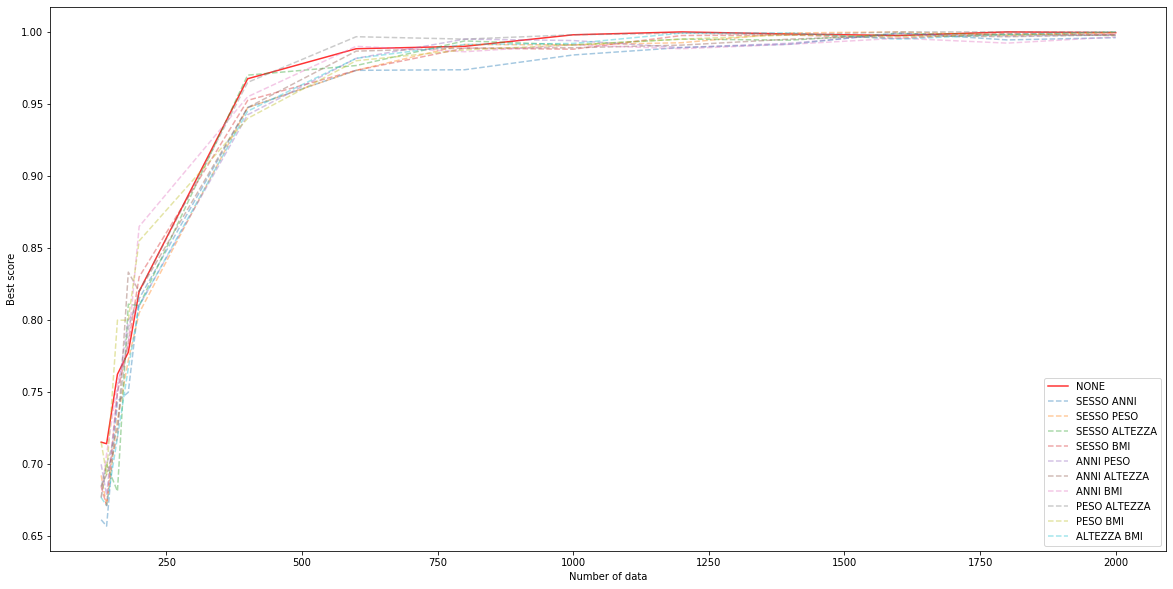

In [95]:
plot_accuracies(accuracies_excluding)

## Small multiples delle accuracy con reference le accuracy senza esclusioni dei dati aumentati perturbando i dati continui

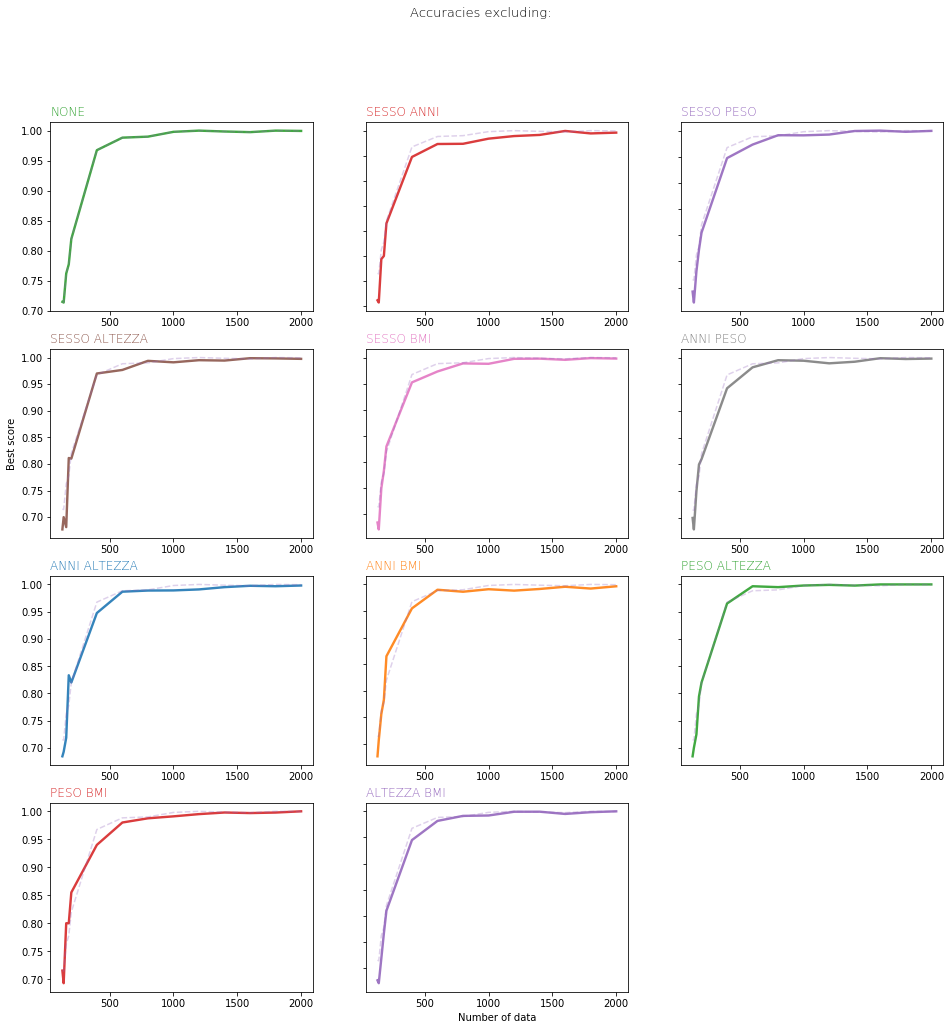

In [96]:
small_multiples(accuracies_excluding)

### zoom sugli ultimi dati (da 600 a 2000)

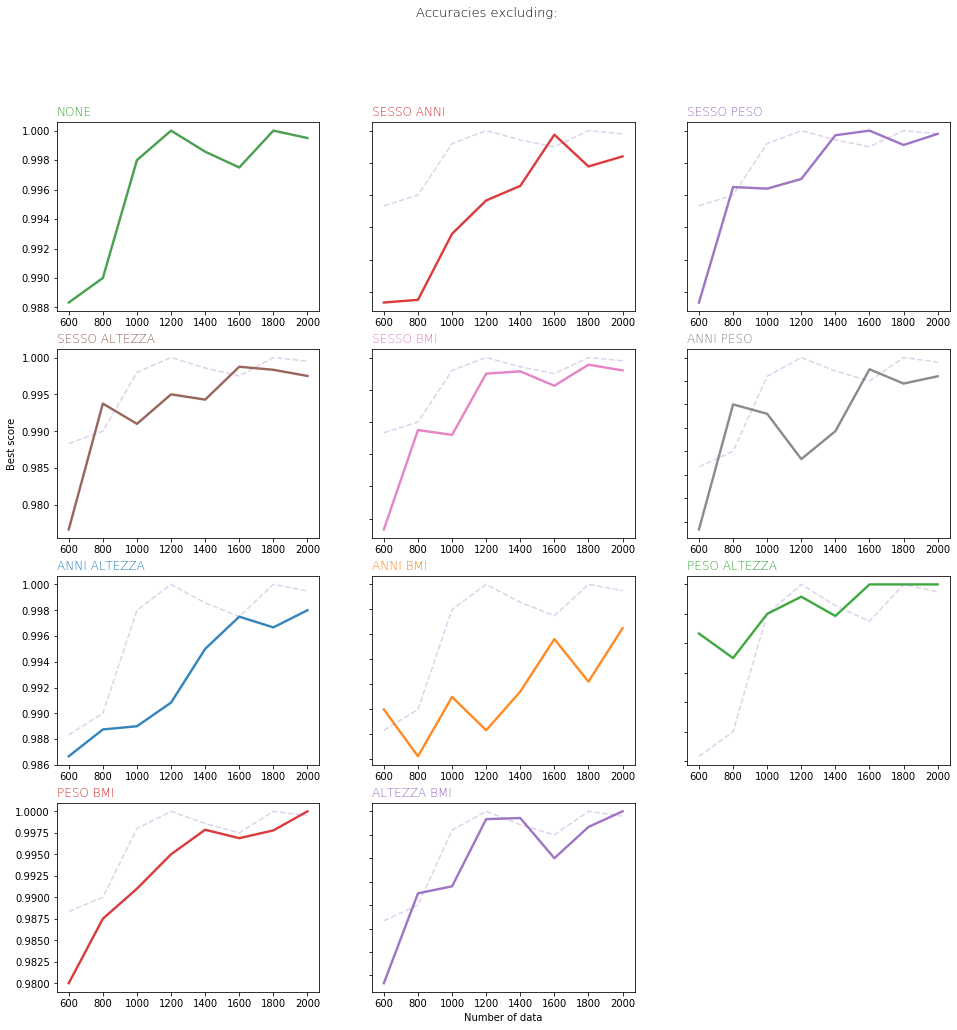

In [97]:
small_multiples({k: v for d in list(map((lambda key : {key : accuracies_excluding[key][6:]}), accuracies_excluding)) for k, v in d.items()})

## Grafici delle accuracy di data augmentation escludendo due elementi alla volta perturbando i dati sulle lesioni

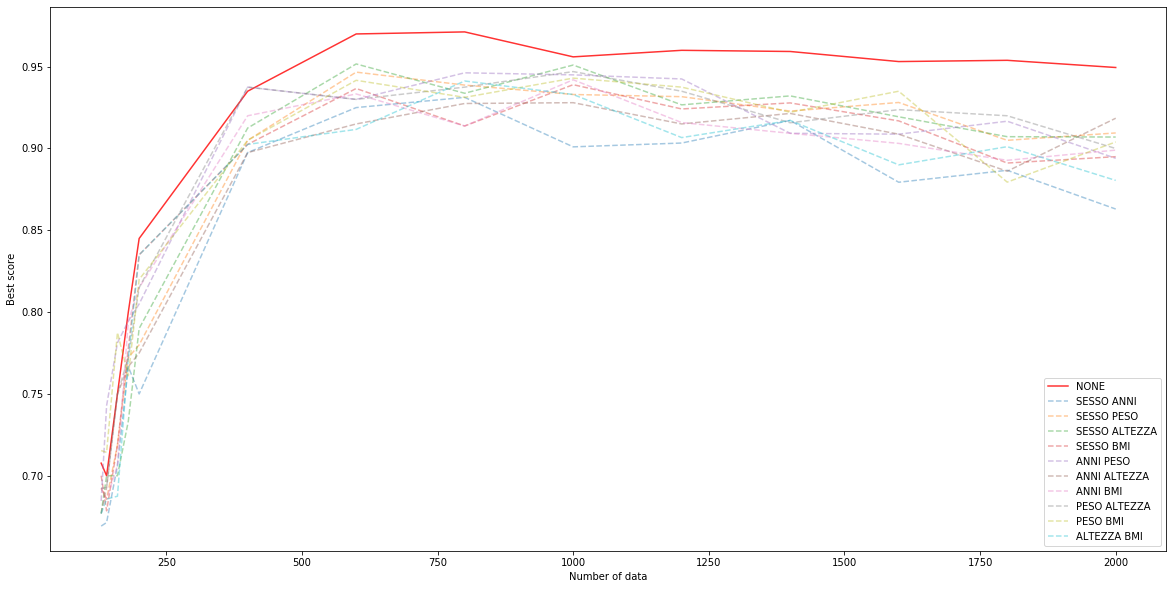

In [98]:
plot_accuracies(accuracies_excluding_body_parts)

## Small multiples delle accuracy con reference le accuracy senza esclusioni perturbando i dati sulle lesioni

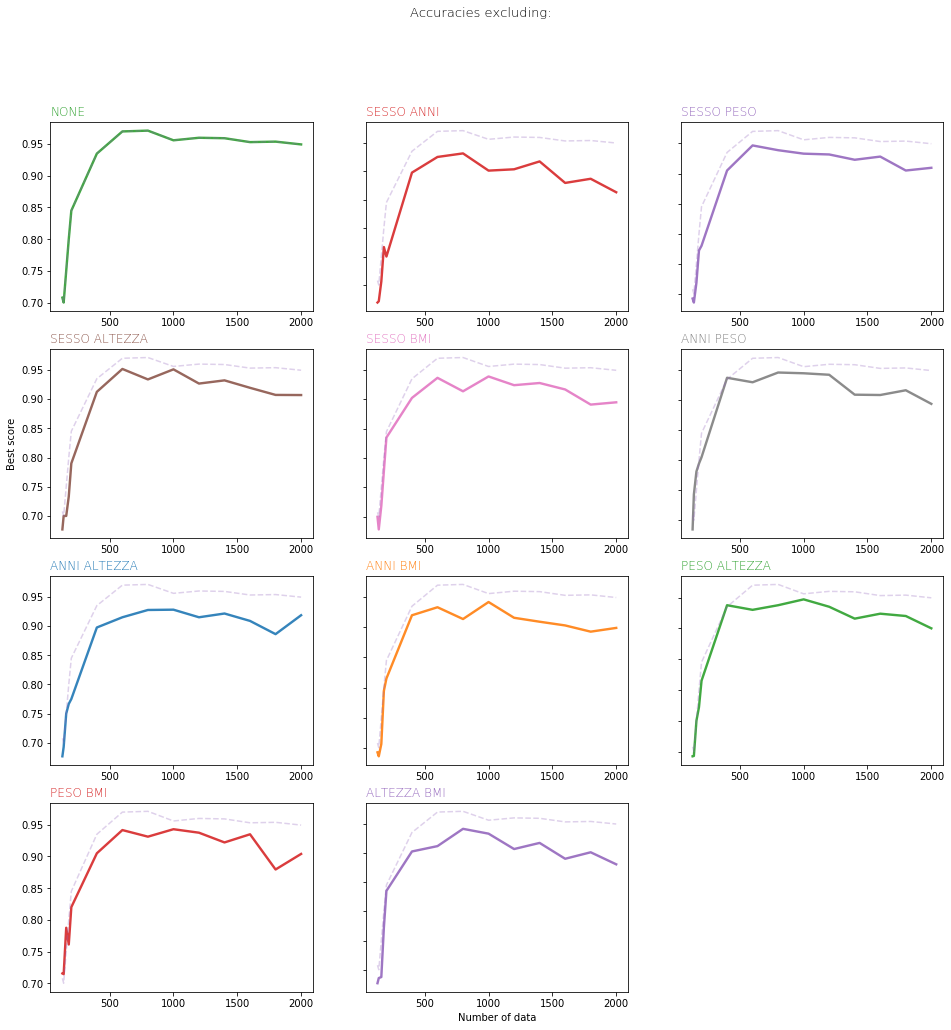

In [99]:
small_multiples(accuracies_excluding_body_parts)

## Grafici delle accuracy di data augmentation escludendo due elementi alla volta perturbando i dati sulle lesioni e i dati continui

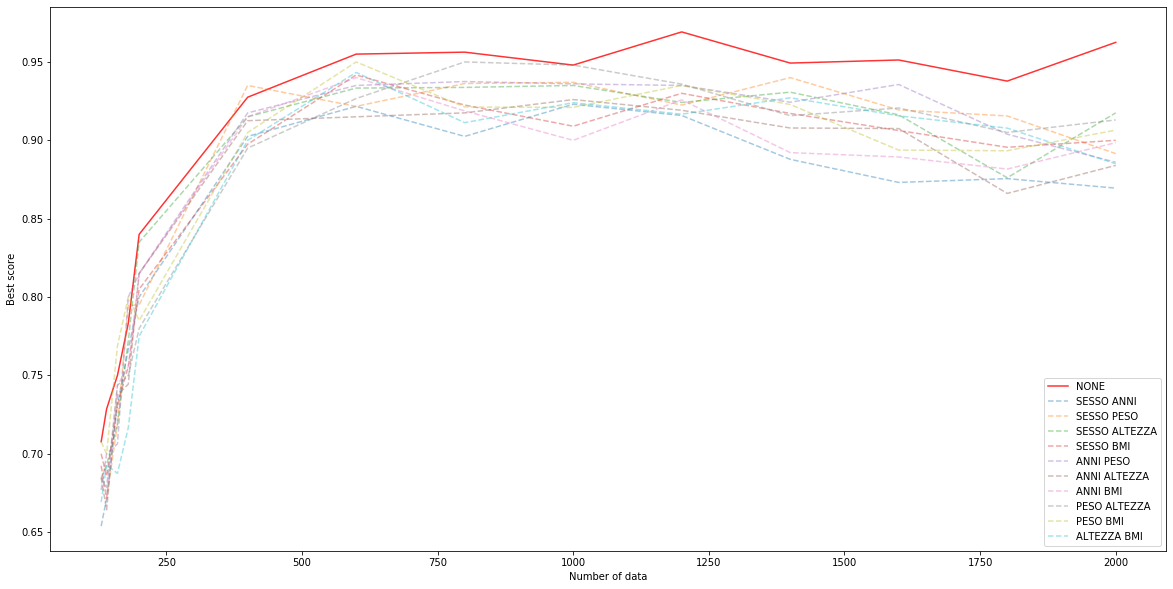

In [100]:
plot_accuracies(accuracies_excluding_both)

## Small multiples delle accuracy con reference le accuracy senza esclusioni perturbando i dati sulle lesioni e i dati continui

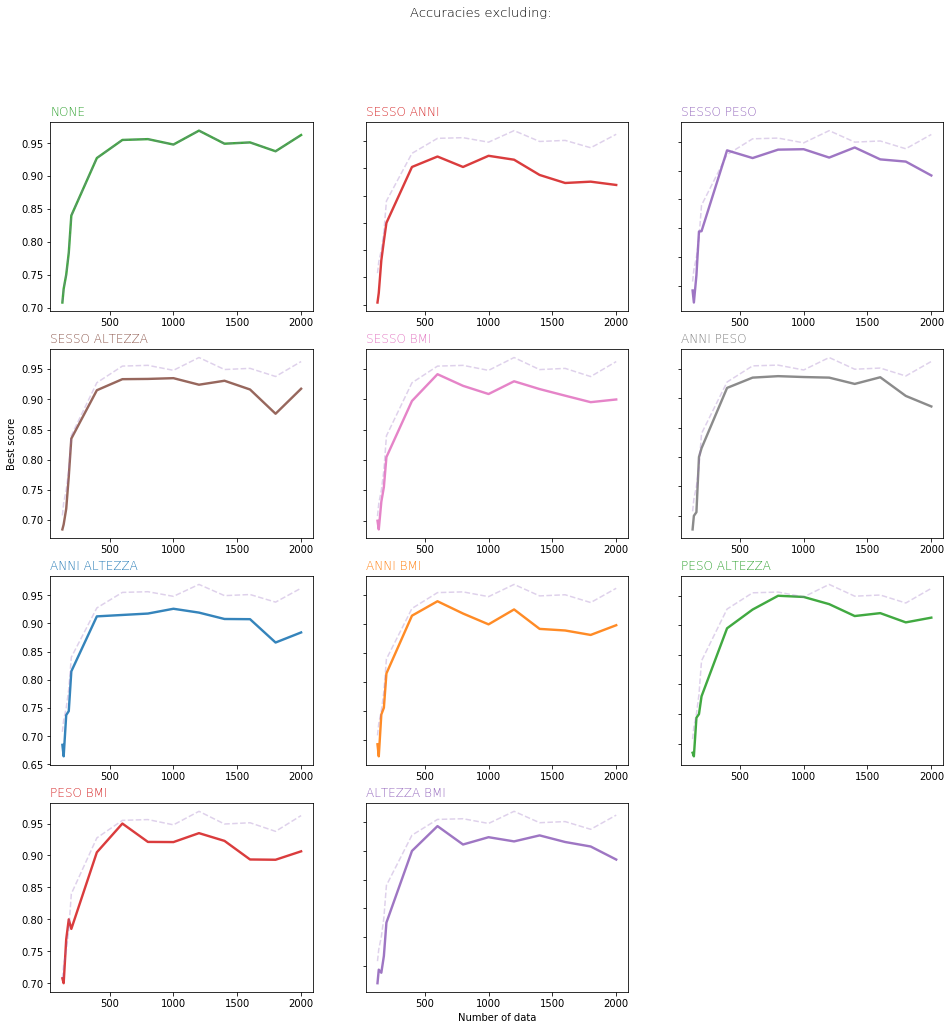

In [101]:
small_multiples(accuracies_excluding_both)